In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [3]:
plt.style.use('seaborn')
plt.rcParams["patch.force_edgecolor"] = True

In [4]:
combined_df = pd.read_csv('data/bob_dylan_sample_dataset.csv')

In [5]:
# additional_s_words = ["aren't", "can't", "couldn't", 'did', "didn't", 'does', "doesn't", 'doing', "don't", "hadn't",
#                       "hasn't", "haven't", 'having', "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm",
#                       "i've", "isn't", "it's", "let's", "mustn't", 'ought', 'ours', 'ourselves', "shan't", "she'd",
#                       "she'll", "she's", "shouldn't", "that's", 'theirs', "there's", "they'd", "they'll", "they're",
#                       "they've", "wasn't", "we'd", "we'll", "we're", "we've", "weren't", "what's", "when's", "where's",
#                       "who's", "why's", "won't", "wouldn't", "you'd", "you'll", "you're", "you've"]

In [6]:
additional_s_words = []

In [7]:
combined_df.drop('Test_Artist', axis=1).describe()

,Band,Lyrics,Song
count,1269,1269,1269
unique,618,1255,1250
top,Bob Dylan,Maybe I should have saved those left over drea...,Here's That Rainy Day
freq,617,4,5


In [8]:
combined_df['Lyrics'][:10]

0    With your mercury mouth in the missionary time...
1    How many roads must a man walk down\r\nBefore ...
2    Everybody's building\r\nThe big ships and the ...
3    Well, today has been a sad ol' lonesome day\r\...
4    0l' black Bascom, don't break no mirrors\r\nCo...
5    Well, the rainman comes with his magic wand\r\...
6    Now I taught the weeping willow how to cry,\r\...
7    Love, oh, love, oh careless love\r\nLove, oh, ...
8    Well, if you're travelin' in the north country...
9    Well you asked me if I'll forget my baby.\r\nI...
Name: Lyrics, dtype: object

In [9]:
# for lyric in combined_df['Lyrics'][:10]:
#     print(lyric)
#     print('\n')

In [10]:
# def lyric_cleanup(lyrics):
#     '''
#     1. remove punctuation
#     2. remove stopwords from nltk.corpus
#     3. return list of clean word list from lyrics
#     '''
#     rm_additional = [word for word in lyrics.split() if word.lower() not in additional_s_words]
#     rm_additional = ' '.join(rm_additional)
#     rm_punct = [char for char in rm_additional if char not in string.punctuation]
#     rm_punct = ''.join(rm_punct)
#     return [word.lower() for word in rm_punct.split() if word.lower() not in stopwords.words('english')]

In [11]:
# lyrics_pipeline = Pipeline([
#         ('convert_lyrics', CountVectorizer(analyzer=lyric_cleanup)),
#         ('tf-idf', TfidfTransformer()),
#         ('naive_bayes', MultinomialNB())
#     ])

In [12]:
vectorize = CountVectorizer(stop_words='english').fit(combined_df['Lyrics'])

In [13]:
print(len(vectorize.vocabulary_))

15298


In [14]:
# song_example = combined_df['Lyrics'][972]
# print(song_example)

In [15]:
# vect_example = vectorize.transform([song_example])
# print(vect_example)
# # print(vect_example.shape)

In [16]:
# # see what is repeated 10 times
# print(vectorize.get_feature_names()[2238])

In [17]:
lyrics_vector = vectorize.transform(combined_df['Lyrics'])

In [18]:
sum_words = np.asarray(lyrics_vector.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'word': vectorize.get_feature_names(), 'count': sum_words})
counts_df.sort_values(by='count', ascending=False).head(20)

,word,count
3912,don,1625
7587,like,1452
7787,love,1450
7136,just,1443
7272,know,1346
7661,ll,1324
5769,got,1192
9117,oh,964
13563,time,933
14250,ve,832


In [19]:
print('Shape of Sparse Matrix: ', lyrics_vector.shape)
print('Amount of Non-Zero occurences: ', lyrics_vector.nnz)

Shape of Sparse Matrix:  (1269, 15298)
Amount of Non-Zero occurences:  83474


In [20]:
sparsity = (100.0 * lyrics_vector.nnz / (lyrics_vector.shape[0] * lyrics_vector.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [21]:
tfidf_transformer = TfidfTransformer().fit(lyrics_vector)

In [22]:
tfidf_weights = TfidfTransformer().fit_transform(lyrics_vector)
weights = np.asarray(tfidf_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorize.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,word,weight
7787,love,0.036103
3912,don,0.031913
7661,ll,0.028470
7272,know,0.028249
7136,just,0.027770
7587,like,0.026939
5769,got,0.023954
851,baby,0.023451
13563,time,0.022701
9117,oh,0.021450


In [23]:
# tfidf_example = tfidf_transformer.transform(vect_example)

In [24]:
# print(tfidf_example)

In [25]:
# tfidf_transformer.idf_[vectorize.vocabulary_['Ghostbusters']]

In [26]:
# lyrics_tfidf = tfidf_transformer.transform(lyrics_vector)

In [27]:
# bd_detect_model = MultinomialNB().fit(lyrics_tfidf,combined_df['Test_Artist'])

In [28]:
# bd_detect_model.predict(tfidf_example)[0]

In [29]:
# all_predictions = bd_detect_model.predict(lyrics_tfidf)

In [30]:
# all_predictions

In [31]:
lyric_train, lyric_test, bd_train, bd_test = train_test_split(combined_df['Lyrics'], combined_df['Test_Artist'],test_size=0.3)

## Create a pipeline

In [32]:
lyrics_pipeline = Pipeline([
        ('convert_lyrics', CountVectorizer(stop_words='english')),
        ('tf-idf', TfidfTransformer()),
        ('naive_bayes', MultinomialNB())
    ])

In [33]:
lyrics_pipeline.fit(lyric_train, bd_train)

Pipeline(memory=None,
     steps=[('convert_lyrics', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english'...=False, use_idf=True)), ('naive_bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [34]:
predictions = lyrics_pipeline.predict(lyric_test)

In [35]:
print(metrics.classification_report(bd_test, predictions))

             precision    recall  f1-score   support

          0       0.87      0.50      0.63       200
          1       0.62      0.92      0.74       181

avg / total       0.75      0.70      0.69       381



In [36]:
metrics.confusion_matrix(bd_test, predictions)

array([[100, 100],
       [ 15, 166]])

In [37]:
TN = metrics.confusion_matrix(bd_test, predictions)[0][0]
FN = metrics.confusion_matrix(bd_test, predictions)[1][0]
FP = metrics.confusion_matrix(bd_test, predictions)[0][1]
TP = metrics.confusion_matrix(bd_test, predictions)[1][1]

In [38]:
accuracy = (TN + TP) / (FP + FN + TN + TP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2/((1/recall) + (1/precision))

In [39]:
print(f'''Accuracy: {accuracy:.4f}
Precision: {precision:.4f}
Recall: {recall:.4f}
F1-Score: {f1_score:.4f}''')

Accuracy: 0.6982
Precision: 0.6241
Recall: 0.9171
F1-Score: 0.7427


In [40]:
def print_classification_information(y_true, y_predict):
    print(f'Accuracy: {metrics.accuracy_score(y_true, y_predict):.4f}')
    print(f'Precision: {metrics.precision_score(y_true, y_predict):.4f}')
    print(f'Recall: {metrics.recall_score(y_true, y_predict):.4f}')
    print(f'F1-Score: {metrics.f1_score(y_true, y_predict):.4f}')

In [41]:
print_classification_information(bd_test, predictions)

Accuracy: 0.6982
Precision: 0.6241
Recall: 0.9171
F1-Score: 0.7427


In [42]:
def calc_vector(data):
    return [vectorize.transform([i]) for i in data]

def calc_tfidf(data):
    return [tfidf_transformer.transform(i) for i in data]

In [43]:
lyric_test_vector = calc_vector(lyric_test)

In [44]:
tfidf_test_vector = calc_tfidf(lyric_test_vector)

In [45]:
x_values = []

length = len(lyric_test_vector)
for i in range(length):
    lyric_value = 0
    vect = lyric_test_vector[i].data
    tf = tfidf_test_vector[i].sorted_indices().data
    len2 = len(vect)
    for a, b in zip(vect.data, tf.data):
        lyric_value += (a*b)
    x_values.append(lyric_value)

In [46]:
np.array(x_values).shape

(381,)

In [47]:
d = {'x_values': x_values, 'bd_test': bd_test.values, 'bd_predictions': predictions}

In [48]:
plot_df = pd.DataFrame(data=d)

In [49]:
plot_df['correct'] = plot_df['bd_test'] == plot_df['bd_predictions']
plot_df['TP'] = (plot_df['bd_test'] == 1) & (plot_df['bd_predictions'] == 1)
plot_df['TN'] = (plot_df['bd_test'] == 0) & (plot_df['bd_predictions'] == 0)
plot_df['FP'] = (plot_df['bd_test'] == 0) & (plot_df['bd_predictions'] == 1)
plot_df['FN'] = (plot_df['bd_test'] == 1) & (plot_df['bd_predictions'] == 0)

In [50]:
plot_df.sum()

x_values          6902.538739
bd_test            181.000000
bd_predictions     266.000000
correct            266.000000
TP                 166.000000
TN                 100.000000
FP                 100.000000
FN                  15.000000
dtype: float64

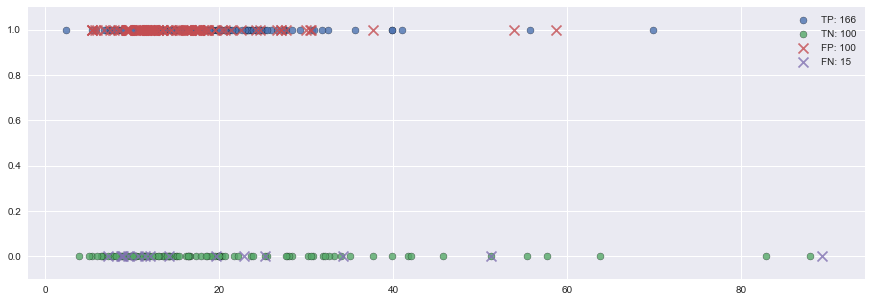

In [51]:
plt.figure(figsize=(15,5))
plt.ylim(ymax=1.1, ymin=(-.1))
plt.scatter(plot_df[plot_df['TP'] == True]['x_values'],plot_df[plot_df['TP'] == True]['bd_predictions'], alpha=0.8, label=f"TP: {plot_df['TP'].sum()}", edgecolors='black')
plt.scatter(plot_df[plot_df['TN'] == True]['x_values'],plot_df[plot_df['TN'] == True]['bd_predictions'], alpha=0.8, label=f"TN: {plot_df['TN'].sum()}", edgecolors='black')
plt.scatter(plot_df[plot_df['FP'] == True]['x_values'],plot_df[plot_df['FP'] == True]['bd_predictions'], alpha=0.8, marker='x', label=f"FP: {plot_df['FP'].sum()}", s=100, edgecolors='black', vmin=0, vmax=1)
plt.scatter(plot_df[plot_df['FN'] == True]['x_values'],plot_df[plot_df['FN'] == True]['bd_predictions'], alpha=0.8, marker='x', label=f"FN: {plot_df['FN'].sum()}", s=100, edgecolors='black', vmin=0, vmax=1)
# plt.xlim(0,60)
plt.legend();

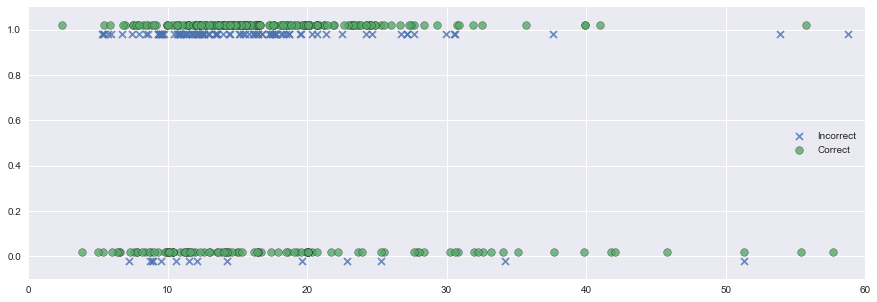

In [52]:
plt.figure(figsize=(15,5))
plt.ylim(ymax=1.1, ymin=(-.1))
plt.scatter(plot_df[plot_df['correct'] == False]['x_values'],plot_df[plot_df['correct'] == False]['bd_predictions']-.02, alpha=0.8, marker='x', label='Incorrect', edgecolors='black', vmin=0, vmax=1)
plt.scatter(plot_df[plot_df['correct'] == True]['x_values'],plot_df[plot_df['correct'] == True]['bd_predictions']+.02, alpha=0.8, label='Correct', s=60, edgecolors='black')
plt.xlim(0,60)
plt.legend();

In [53]:
plot_df['correct'].value_counts()

True     266
False    115
Name: correct, dtype: int64

In [54]:
plot_df['bd_test'].value_counts()

0    200
1    181
Name: bd_test, dtype: int64

In [55]:
plot_df['bd_predictions'].value_counts()

1    266
0    115
Name: bd_predictions, dtype: int64